<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2201_Homework_LOGIC_Image(MASK)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/Naxalov/ComputerVision/raw/master/ROAD/road_signs/bus_stop/bus_stop.png

--2023-04-27 09:30:15--  https://github.com/Naxalov/ComputerVision/raw/master/ROAD/road_signs/bus_stop/bus_stop.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Naxalov/ComputerVision/master/ROAD/road_signs/bus_stop/bus_stop.png [following]
--2023-04-27 09:30:16--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/ROAD/road_signs/bus_stop/bus_stop.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251249 (245K) [image/png]
Saving to: ‘bus_stop.png’

bus_stop.png        100%[===================>] 245.36K  --.-KB/s    in 0.03s   

2023-04-27 09:30:16 (7.90 MB/s) - ‘bus_stop.png’ 

In [2]:
!wget https://raw.githubusercontent.com/Naxalov/ComputerVision/master/ROAD/road_signs/bus_stop/COCO.json

--2023-04-27 09:30:16--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/ROAD/road_signs/bus_stop/COCO.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1465 (1.4K) [text/plain]
Saving to: ‘COCO.json’

COCO.json           100%[===================>]   1.43K  --.-KB/s    in 0s      

2023-04-27 09:30:16 (17.9 MB/s) - ‘COCO.json’ saved [1465/1465]



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json

In [22]:
def get_points(data):
  '''
  data: json
  return: numpy.ndarray, shape: (8,2)
  '''
  a=data["annotations"][0]
  points=np.array(a["segmentation"],dtype=np.int64).reshape((8,2))
  # CODE

  
  return points

In [26]:
def get_mask(img_shape,points):
  '''
  return: mask image
  '''
  zeros=np.zeros(img_shape,dtype=np.uint8)
  mask_img=cv2.fillPoly(zeros,[points],(255,255,255))
  # CODE

  return mask_img

In [37]:
def get_ROI(img,mask):
  '''
  retrun: ROI_img
  '''
  ROI_img=cv2.bitwise_and(img,mask)
  # CODE
  
  return ROI_img

In [24]:
filename ='COCO.json' # enter the file name
f = open(filename)# Read the file and give the value f
data = json.load(f)# Convert f, string data to json format

points = get_points(data)
print(type(points))
print(points.shape)


<class 'numpy.ndarray'>
(8, 2)


In [27]:
img = cv2.imread('bus_stop.png')
img = img[:,:,[2,1,0]]# Replace BGR RGB
img_shape =img.shape # Gives the image shape to the variable

img_mask = get_mask(img_shape,points)

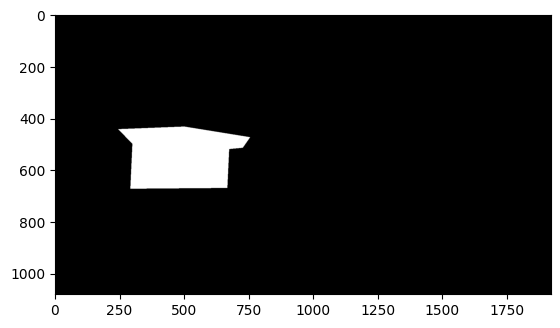

In [39]:
plt.imshow(img_mask)
plt.show()

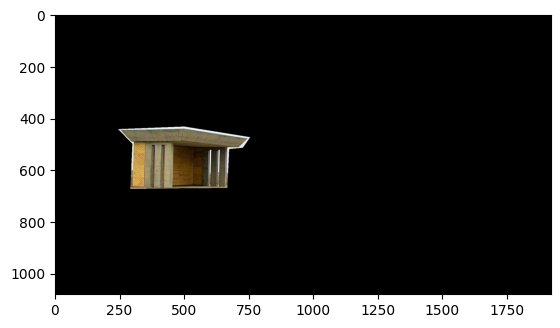

In [38]:
ROI_img = get_ROI(img,img_mask)
plt.imshow(ROI_img)
plt.show()

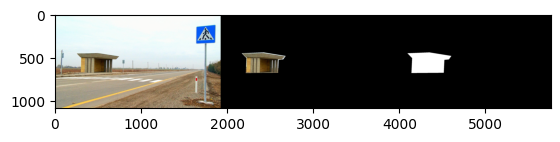

In [41]:
image=np.hstack((img,ROI_img,img_mask))# draw three images vertically
plt.imshow(image)
plt.show()

In [ ]:
True or False